In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mahdinavaei_cat_and_dog_classifier_path = kagglehub.dataset_download('mahdinavaei/cat-and-dog-classifier')

print('Data source import complete.')


Data source import complete.


In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: data/Cat/000122_ZV_SCSW_HeroImages_1900x1024_D1.jpg  
  inflating: data/Cat/00tb-cats1-videoSixteenByNine3000.jpg  
  inflating: data/Cat/07CAT-STRIPES-superJumbo.jpg  
  inflating: data/Cat/1169131-two-cats-outside-banner_990x350.jpg  
  inflating: data/Cat/1181276-tortoise-shell-cat-on-garden-chair-banner_990x350.jpg  
  inflating: data/Cat/1200px-Cat03.jpg  
  inflating: data/Cat/1200px-RedCat_8727.jpg  
  inflating: data/Cat/1521-WIRED-Cat.jpeg  
  inflating: data/Cat/1E3A3E62-B3CA-434A-8C3B3ED0C982FB69_source.jpg  
  inflating: data/Cat/1_5978274.jpg  
  inflating: data/Cat/2.jpg          
  inflating: data/Cat/20190805_2T7A3552_Anne_Savage-scaled.jpg  
  inflating: data/Cat/2022by-lawcampaign.jpg  
  inflating: data/Cat/220726-cat-theo-elise-ew-636p-6cd3b0.jpg  
  inflating: data/Cat/32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg  
  inflating: data/Cat/61RujMNInL._SL1380_.jpg  
  inflating: data/Cat/Banner4.jpg    
  inflating: data/Ca

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cat-and-dog-classifier/data/dog_test2.jpg
/kaggle/input/cat-and-dog-classifier/data/cat_test.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images133.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images412.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images141.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images356.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images77.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images210.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images525.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images272.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images68.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images360.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images69.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images396.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images239.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images494.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [ ]:
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 24.8 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import imghdr

%matplotlib inline

/tmp/ipython-input-1136395143.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 1152 files belonging to 2 classes.


In [ ]:
data_iterate = data.as_numpy_iterator()

In [ ]:
batch = data_iterate.next()

in our plot below the cat is given the number 0 and the dog is given the number 1

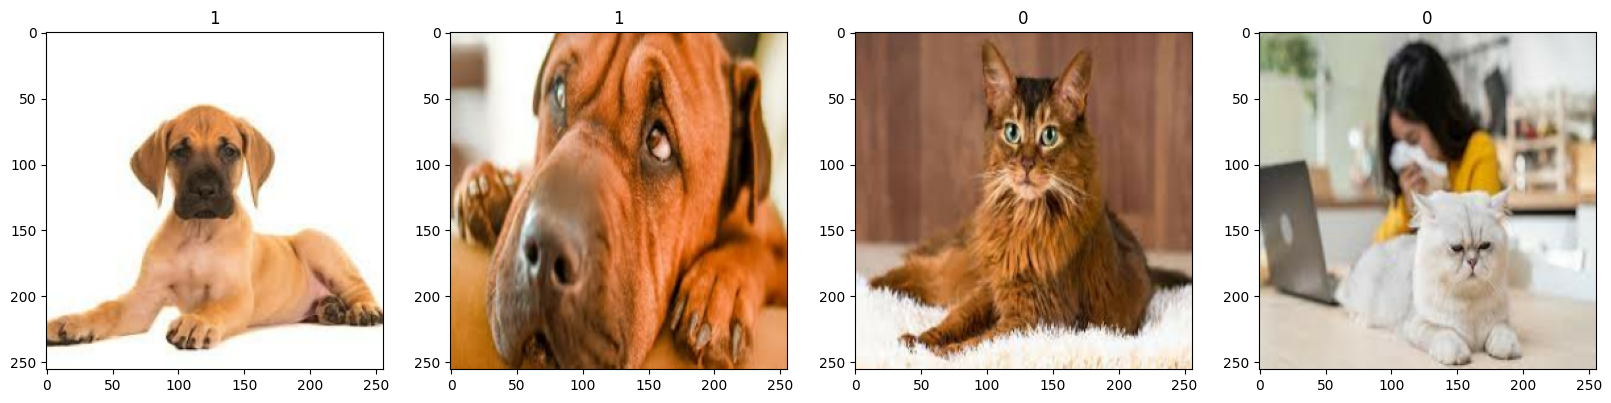

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scaling the data

In [ ]:
data = data.map(lambda x,y : (x/255,y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[6.27788007e-01, 6.16023302e-01, 5.88572323e-01],
          [6.32383585e-01, 6.20618880e-01, 5.93167901e-01],
          [6.38664186e-01, 6.26899481e-01, 5.99448502e-01],
          ...,
          [5.48468113e-01, 3.79840672e-01, 4.58272070e-01],
          [5.36366403e-01, 3.67738962e-01, 4.43259805e-01],
          [5.22579670e-01, 3.53952199e-01, 4.28461999e-01]],
 
         [[6.31587029e-01, 6.19822323e-01, 5.92371345e-01],
          [6.36182606e-01, 6.24417901e-01, 5.96966922e-01],
          [6.42463207e-01, 6.30698502e-01, 6.03247523e-01],
          ...,
          [5.40602982e-01, 3.74142170e-01, 4.50406909e-01],
          [5.28278649e-01, 3.60630661e-01, 4.35172051e-01],
          [5.13245344e-01, 3.48090440e-01, 4.17391419e-01]],
 
         [[6.37789607e-01, 6.26024902e-01, 5.98573923e-01],
          [6.41881108e-01, 6.30116403e-01, 6.02665424e-01],
          [6.48161769e-01, 6.36397064e-01, 6.08946085e-01],
          ...,
          [5.32781839e-01, 3.70044917e-01, 4.4148

In DL we split our data into train , test , validation

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

25

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build DL model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(64, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(128, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(256, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(512, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile("adam",loss=tf.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,204,529 (16.04 MB)

 Trainable params: 4,204,529 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [ ]:
logdir = "logs"

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])
print(hist.history) # this will print a dictionary object, now you need to grab the metrics / score you're looking for

# if your score == 'acc', if not replace 'acc' with your metric

best_score = max(hist.history['val_accuracy'])

print(f"Best Validation score is: {best_score}")

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 336ms/step - accuracy: 0.5355 - loss: 0.8203 - val_accuracy: 0.6518 - val_loss: 0.6762
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.6134 - loss: 0.6715 - val_accuracy: 0.6786 - val_loss: 0.6274
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - accuracy: 0.6942 - loss: 0.5839 - val_accuracy: 0.7366 - val_loss: 0.5881
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 315ms/step - accuracy: 0.7943 - loss: 0.5121 - val_accuracy: 0.7545 - val_loss: 0.5144
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.8196 - loss: 0.4072 - val_accuracy: 0.8214 - val_loss: 0.4953
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 284ms/step - accuracy: 0.8555 - loss: 0.3336 - val_accuracy: 0.8080 - val_loss: 0.4686
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step - accuracy: 0.9112 - loss: 0.2355 - val_accuracy: 0.7857 - val_loss: 0.4556
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - accuracy: 0.9333 - loss: 0.1750 - val_accuracy: 

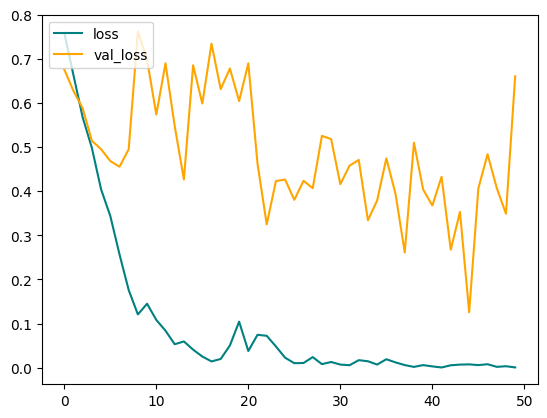

In [ ]:
ig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

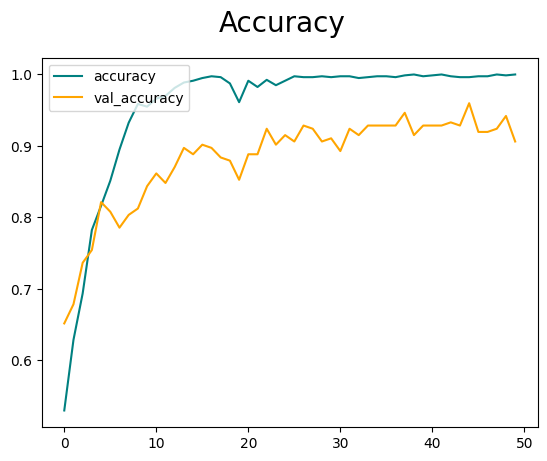

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Let`s evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [ ]:
print(f"Precision: {pre.result().numpy()} , Recall: {re.result().numpy()}, BinaryAccuracy: {acc.result().numpy()}")

Precision: 0.957446813583374 , Recall: 0.9375, BinaryAccuracy: 0.9479166865348816


Testing

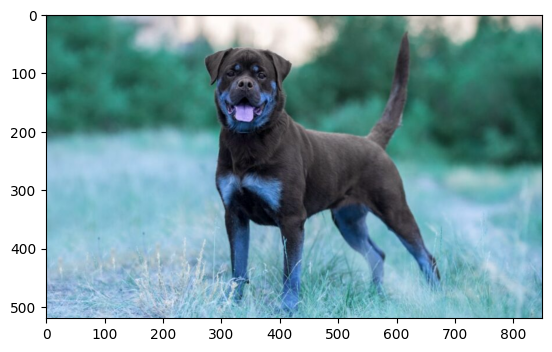

In [ ]:
img = cv2.imread("/kaggle/input/cat-and-dog-classifier/data/dog_test2.jpg")
plt.imshow(img)
plt.show()

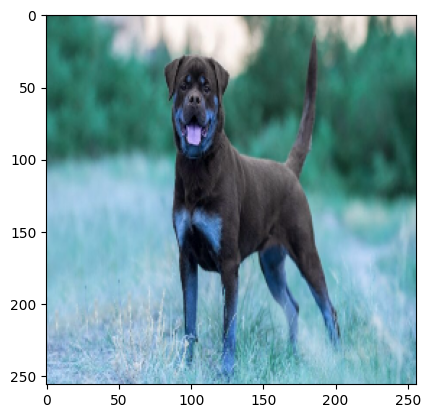

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/225,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


In [ ]:
yhat

array([[0.9863746]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog


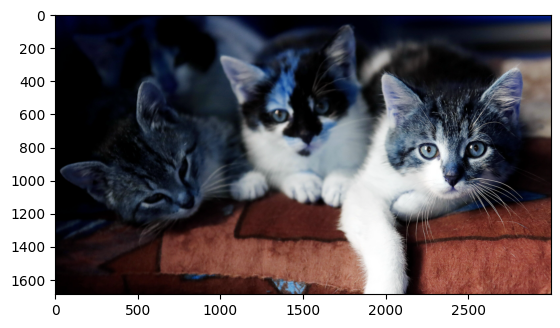

In [ ]:
img2 = cv2.imread("/kaggle/input/cat-and-dog-classifier/data/Cat/00tb-cats1-videoSixteenByNine3000.jpg")
plt.imshow(img2)
plt.show()

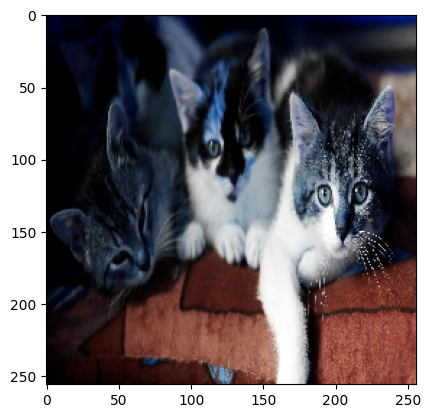

In [ ]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [ ]:
yhat2 = model.predict(np.expand_dims(resize2/225,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
yhat2

array([[5.9371637e-06]], dtype=float32)

In [ ]:
if yhat2 > 0.5:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat


In [ ]:
model.save("dogcatclassifier.keras")

In [ ]:
# from tensorflow.keras.models import load_model

# model2 = load_model("/content/dogcatclassifier.keras")